In [6]:
## For some arithmetic and Matrix Operations
import numpy as np

## Dataframe Manipulation
import pandas as pd

## For Visualization
import matplotlib.pyplot as plt

## For Visualization too
import seaborn as sns

## Creating Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


## Creating a function transformer
from sklearn.preprocessing import FunctionTransformer

## For Column Transformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector


## For preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

## For missing values
from sklearn.impute import SimpleImputer

## Getting the recall score on our train set
from sklearn.metrics import recall_score

## Getting the accuracy score on train set
from sklearn.metrics import accuracy_score

## Getting the classification report from our train set
from sklearn.metrics import classification_report

## Cross validation
from sklearn.model_selection import cross_val_score

## Gridsearch CV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Imbalanced pipeline and SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [7]:
df = pd.read_csv('/content/sample_data/CVD_cleaned.csv')

df.head()


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [8]:
df.head()
## Printing number of records in the transformed dataFrame
print('Number of records in the dataFrame:', len(df))
print('The columns of the dataFrame:', list(df.columns))
print('The types of the transformed dataFrames variables:\n', df.dtypes)



Number of records in the dataFrame: 109716
The columns of the dataFrame: ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
The types of the transformed dataFrames variables:
 General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smok

קובץ הנתונים עליו נעבוד מכיל נתונים סטטיסטיים רשמיים על מעל ל300 אלף בני אדם שנאספו בעזרת סקרים טלפוניים שנערכו בארצות הברית על ידי המרכז לבקרה ומניעה של מחלות ומעובדת על ידי המערכת לסקרי רכיבי סיכון בהתנהגות. ארגון זה הוא המערכת המובילה בארצות הברית לסקרים טלפוניים הקשורים לנתונים רלוונטיים לבריאות של תושבי ארצות הברית.
הסקרים אוספים נתונים אודות התנהגויות מסוכנות הקשורות לבריאות, מצבי בריאות כרוניים, ושימוש בשירותים מונעים. בין המדדים הנאספים: גובה, מין ומשקל, קיום רקע של מחלות לבביות וסרטן, הרגלי כושר גופני וצריכה של מאכלים שונים כגון פירות, ירקות ומאכלים מטוגנים.
קישור לאתר בו נמצא קובץ הנתונים: https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset/data




# Transformating the Data frame

In [9]:
from IPython.display import display
# Part 1: Data Manipulation:
## Creating the data frame we'll use for the sake of the project:
df_for_project = df[['Heart_Disease', 'Sex','Depression', 'BMI', 'FriedPotato_Consumption','Alcohol_Consumption', 'Fruit_Consumption']]

df_for_project=df_for_project.dropna()
## Create a new DataFrame with the 'Sex' and 'Heart Disease' column mapped to 1's and 0's
replacement_dict = {'Sex': {'Male': 1, 'Female': 0},'Heart_Disease': {'Yes': 1, 'No': 0}, 'Depression': {'Yes': 1, 'No': 0}}
df_for_project.replace(replacement_dict, inplace=True)

## Set the desired dataTypes of the binary attributes to be int
column_data_types = {'Heart_Disease': int, 'Sex': int, 'Depression': int}
df_for_project = df_for_project.astype(column_data_types)

## Display the resulting DataFrame
display(df_for_project)




,Heart_Disease,Sex,Depression,BMI,FriedPotato_Consumption,Alcohol_Consumption,Fruit_Consumption
0,0,0,0,14.54,12.0,0.0,30.0
1,1,0,0,28.29,4.0,0.0,30.0
2,0,0,0,33.47,16.0,4.0,12.0
3,1,1,0,28.73,8.0,0.0,30.0
4,0,1,0,24.37,0.0,0.0,8.0
...,...,...,...,...,...,...,...
109710,0,0,1,31.62,4.0,4.0,60.0
109711,0,1,0,23.49,2.0,5.0,90.0
109712,0,1,0,35.44,20.0,4.0,30.0
109713,0,1,0,38.74,0.0,0.0,120.0


In [10]:
## Printing number of records in the transformed dataFrame and the new types
print('Number of records in the dataFrame:', len(df_for_project))
print('The columns of the transformed dataFrame:', list(df_for_project.columns))
print('The types of the transformed dataFrames variables:\n', df_for_project.dtypes)

Number of records in the dataFrame: 109715
The columns of the transformed dataFrame: ['Heart_Disease', 'Sex', 'Depression', 'BMI', 'FriedPotato_Consumption', 'Alcohol_Consumption', 'Fruit_Consumption']
The types of the transformed dataFrames variables:
 Heart_Disease                int64
Sex                          int64
Depression                   int64
BMI                        float64
FriedPotato_Consumption    float64
Alcohol_Consumption        float64
Fruit_Consumption          float64
dtype: object


הורדנו את העמודות שלא יהיו לנו רלוונטיות להמשך התרגיל וביצענו המרה של הערכים של העמודות להיות ערכים מספריים

העמודות שהורדנו ולא נעבוד איתן בהמשך הן :

General_Health  

Checkup       

Exercise        

Skin_Cancer    

Other_Cancer   

Diabetes     

Arthritis      

Age_Category   

Height_(cm)

Weight_(kg)

Smoking_History

Green_Vegetables_Consumption


 תאור משמעות העמודות:

*   עבור המשתנים של מין הנשאל המרנו גבר ל-1 ואישה ל-0
*   עבור רקע מחלות לב המרנו כן ל-1 ולא ל-0
*   עבור השאלה האם אדם סובל מדכאון המרנו כן ל-1 ולא ל-0
*   צריכת אלכוהול ביחידות של ליטרים שנצרכו בחודש
*   צריכת פירות ותפוחי אדמה מטוגנים ביחידות של מספר הפריטים שנצרכו בחודש  
*   BMI ביחידות של פלואט כי מדובר במשתנה רציף שתלוי בגובה ומשקל רציפים ממשיים.
The WHO regards an adult BMI of less than 18.5 as **underweight** and possibly indicative of malnutrition, an eating disorder, or other health problems, while a BMI of 25 or more is considered **overweight** and 30 or more is considered **obese**.
    




### Part 2- Data visualization

In [11]:
# Part 2: Data Visualization:
# Visualizing the numeric variables

## Defining a new funtction for the visualization
def visualize_numeric(column_name, title, num_of_bins, units, color):
  hist_plot=df_for_project[column_name].hist(bins=num_of_bins, color=color, edgecolor = "black",  grid = False)

  mean_value = df_for_project[column_name].mean()
  plt.axvline(mean_value, color='mediumaquamarine', linestyle='dashed', linewidth=2, label='Mean')

  ## Display the plot
  plt.title(title + 'Distribution',  size = 15, fontweight = "bold")
  plt.xlabel(title + '['+units+']')
  #hist_plot.set_yscale('log') # Log scale the Y-axis
  plt.ylabel('Number of people')

  plt.legend()  # Display legend with the label for the mean line

  plt.show()


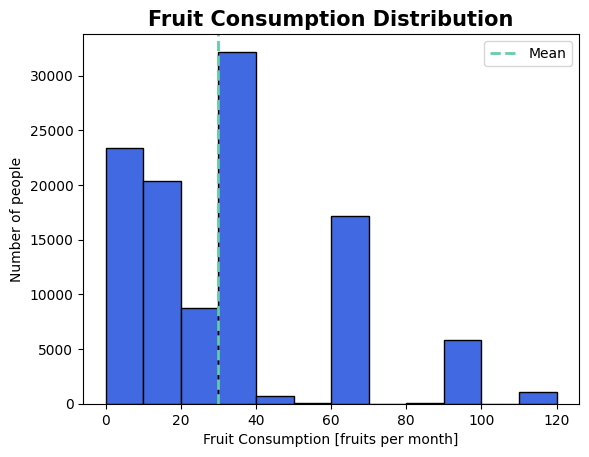


count    109715.000000
mean         29.760124
std          24.790391
min           0.000000
25%          12.000000
50%          30.000000
75%          30.000000
max         120.000000
Name: Fruit_Consumption, dtype: float64


In [12]:

#Summary of important statistical information about the Fruit Consumption data

## Fruit consumption histogram
visualize_numeric('Fruit_Consumption','Fruit Consumption ', 12, 'fruits per month', 'royalblue')

summary_Fruit_Consumption = df_for_project['Fruit_Consumption'].describe()
print()
print(summary_Fruit_Consumption)


מההיסטוגרמה וסיכום הערכים הסטטיסטיים, עולה כי רוב האנשים צורכים כ30 פירות בחודש. קיימים מספר ערכי צריכה חריגים של כ80-120 פירות בחודש לאדם.

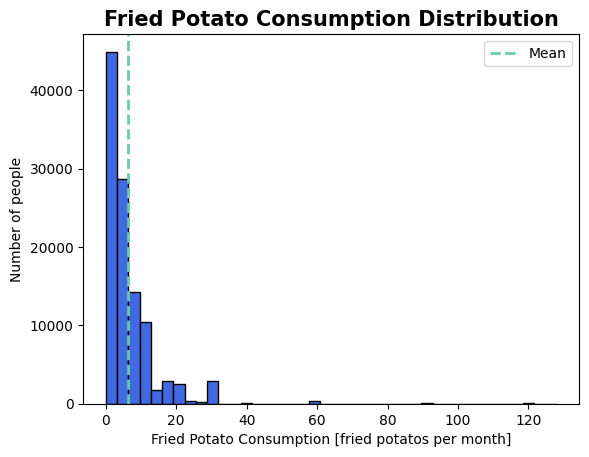


count    109715.000000
mean          6.251479
std           8.526683
min           0.000000
25%           2.000000
50%           4.000000
75%           8.000000
max         128.000000
Name: FriedPotato_Consumption, dtype: float64


In [13]:
## Fried Potatos consumption histogram
visualize_numeric('FriedPotato_Consumption','Fried Potato Consumption ', 40, 'fried potatos per month', 'royalblue')
#Summary of important statistical information about the Fried Potatos Consumption data
summary_Fried_Potatos_Consumption = df_for_project['FriedPotato_Consumption'].describe()
print()
print(summary_Fried_Potatos_Consumption)



מההיסטוגרמה וסיכום הערכים הסטטיסטיים, עולה כי רוב האנשים צורכים כ5 תפוחי אדמה מטוגנים בחודש. קיימים מספר ערכי צריכה חריגים רבים, כגון 128, שהוא הערך הקיצוני ביותר בסיכום הערכים, המתבטאים בהתפלגות עם זנב ימני ארוך. במשתנה זה, בחירה של ייצוג בבוקס פלוס למשל, הייתה פחות אינפורמטיבית בשל הזנב הארוך שהיינו מקבלים.

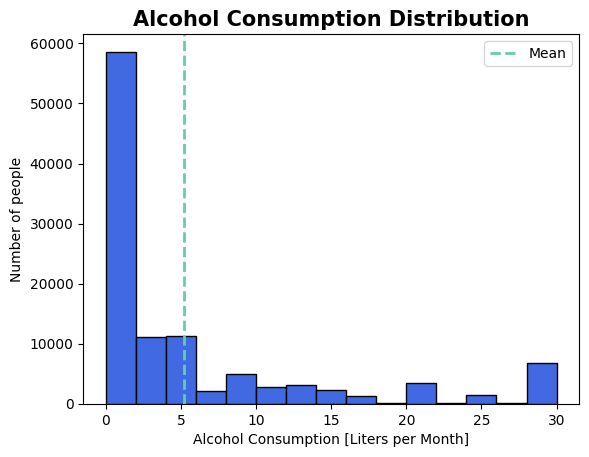


count    109715.000000
mean          5.189473
std           8.312508
min           0.000000
25%           0.000000
50%           1.000000
75%           6.000000
max          30.000000
Name: Alcohol_Consumption, dtype: float64


In [14]:
# Alcohol consumption histogram
visualize_numeric('Alcohol_Consumption','Alcohol Consumption ', 15, 'Liters per Month', 'royalblue')
print()
#Summary of important statistical information about the Alcohol Consumption data
summary_Alcohol_Consumption= df_for_project['Alcohol_Consumption'].describe()
print(summary_Alcohol_Consumption)

מסיכום הנתונים וההיסטוגרמה, נשים לב שרוב האנשים לא צורכים אלכוהול, או צורכים בכמות מעטה מאוד ביחידות של ליטרים בחודש. מסיכום זה, לא נסיק שקיימים ערכים חריגים בצריכת האלכוהול, מאחר שהפיזור של הערכים השונים מ0 מאוזן באופן יחסי. ניתן לראות שהנתונים מגיעים ככל הנראה מהתפלגות עם זנב ימני ארוך, סיבה שגם במקרה זה גורמת להיסטוגרה להציג אותם בצורה טובה יותר מתצוגות אחרות.

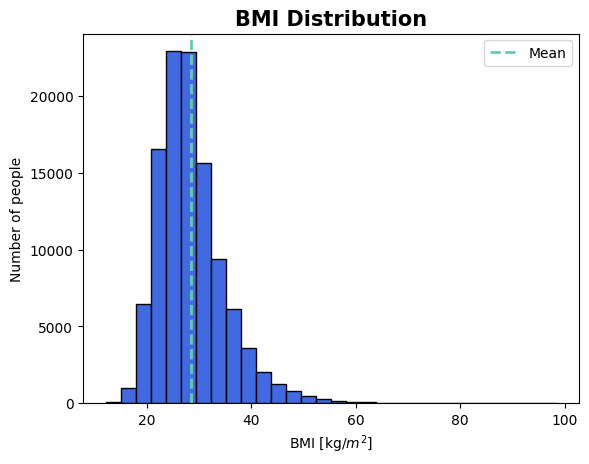


count    109715.000000
mean         28.526698
std           6.538385
min          12.160000
25%          24.130000
50%          27.410000
75%          31.650000
max          98.440000
Name: BMI, dtype: float64


In [19]:
## BMI values histogram
visualize_numeric('BMI','BMI ', 30, 'kg/$m^2$', 'royalblue')
#Summary of important statistical information about the Fried Potatos Consumption data
summary_BMI = df_for_project['BMI'].describe()
print()
print(summary_BMI)

מסיכום הנתונים וההיסטוגרמה, נשים לב שרוב האנשים נמצאים בטווח של BMI שבין 25-30, כלומר מוגדרים ב''עודף משקל''. נשים לב שהערכים מתפלגים בצורה שמזכירה התפלגות א-סימטרית עם זנב ימני ארוך יותר מהשמאלי (כדוגמת התפלגות כי בריבוע למשל) ואופן הצגת הנתונים באופן היסטוגרמי מנדב מידע רב יותר כאשר בוחרים להסתכל על הBMI כמדד רציף ולא כמשתנה קטגוריאלי לפי תלות בקטגוריות סיווג המשקל השונות.

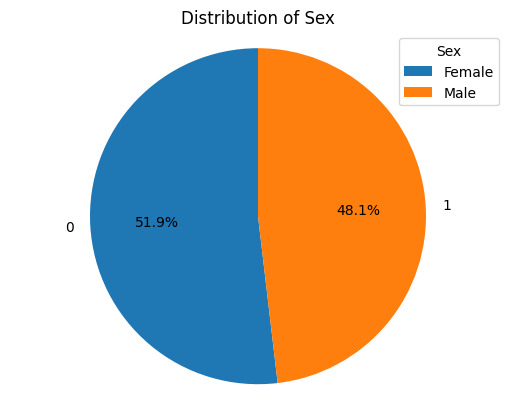

In [ ]:
# Visualizing the categorial variables:

# Creating a pie chart for the 'Sex' column
sex_mapping = {1: 'Male', 0: 'Female'}
df_for_project['Sex_labels'] = df_for_project['Sex'].map(sex_mapping)

sex_counts = df_for_project['Sex'].value_counts()
labels = sex_counts.index
sizes = sex_counts.values

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio so that the chart is drawn as a circle.

# Add a legend with mapped labels
plt.legend(labels.map(sex_mapping), title='Sex', loc='upper right')

# Display the Gender pie chart
plt.title('Distribution of Sex')
plt.show()


ניתן לראות כי כמות הגברים שהשתתפו באיסוף הנתונים נמוכה מכמות הנשים בכ2.9 אחוזים

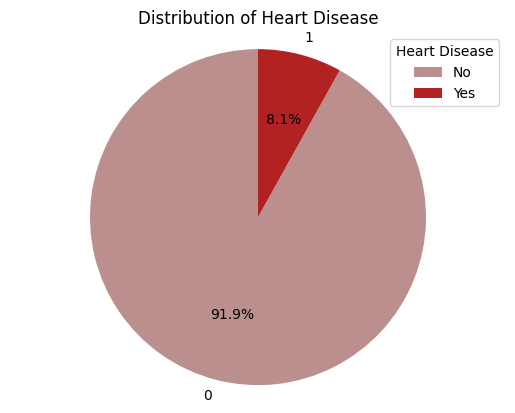

In [ ]:
# Visualizing the categorial variables:

# Creating a pie chart for the 'Heart_Disease' column
disease_mapping = {1: 'Yes', 0: 'No'}
df_for_project['Heart_Disease_labels'] = df_for_project['Heart_Disease'].map(disease_mapping)

disease_counts = df_for_project['Heart_Disease'].value_counts()
labels = disease_counts.index
sizes = disease_counts.values

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['rosybrown','firebrick'])
plt.axis('equal')  # Equal aspect ratio so that the chart is drawn as a circle.

# Add a legend with mapped labels
plt.legend(labels.map(disease_mapping), title='Heart Disease', loc='upper right')

# Display the Heart Disease pie chart
plt.title('Distribution of Heart Disease')
plt.show()


ניתן לראות כי כ8.1 אחוזים מהאנשים בדאטא סט שלנו סובלים ממחלות לב

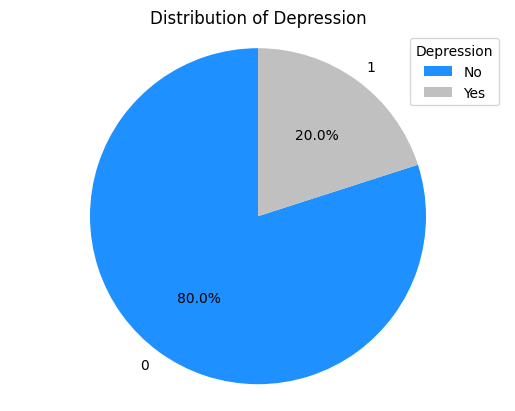

In [ ]:
# Visualizing the categorial variables:

# Creating a pie chart for the 'Depression' column
disease_mapping = {1: 'Yes', 0: 'No'}
df_for_project['Depression_labels'] = df_for_project['Depression'].map(disease_mapping)

disease_counts = df_for_project['Depression'].value_counts()
labels = disease_counts.index
sizes = disease_counts.values

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['dodgerblue','silver'])
plt.axis('equal')  # Equal aspect ratio so that the chart is drawn as a circle.

# Add a legend with mapped labels
plt.legend(labels.map(disease_mapping), title='Depression', loc='upper right')

# Display the Depression pie chart
plt.title('Distribution of Depression')
plt.show()


ניתן לראות כי כ20% מהנשאלים והאנשים בדאטאסט שלנו סובלים מדיכאון

#### PART 3

שאלות מחקר:

האם עליה בצריכת הפירות גורמת לירידה במדד מסת הגוף?1.
Does a higher fruit consumption lead to a lower BMI?


האם עליה בצריכת תפוחי אדמה מטוגנים גורמת למחלות לב?
2.Does a higher fried potatos consumption lead to heart disease?


האם נשים צורכות יותר פירות ביחס לגברים?
3.Do women consume more fruits than men?


האם אנשים הסובלים מדכאון צורכים יותר אלכוהול מאנשים שלא סובלים מדכאון?
4.Do people who are considered to be suffering from Depression consume more alcohol than people who don't?



